In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('MA888.csv')
df.head()

,order_book_id,trading_date,close,total_turnover,limit_down,open,volume,high,settlement,open_interest,prev_settlement,limit_up,low,underlying_symbol,dominant_id
0,MA888,2020/12/4,2243,2.729787e+10,2137,2257,1218111,2265,2245,767885,2274,2411,2210,MA,MA2101
1,MA888,2020/12/7,2247,2.161998e+10,2110,2244,957908,2286,2261,715366,2245,2380,2238,MA,MA2101
2,MA888,2020/12/8,2231,2.697676e+10,2125,2254,1198967,2284,2254,719650,2261,2397,2229,MA,MA2101
3,MA888,2020/12/9,2273,2.140911e+10,2119,2242,950671,2281,2256,651728,2254,2389,2234,MA,MA2101
4,MA888,2020/12/10,2309,2.391723e+10,2120,2273,1037174,2335,2310,632756,2256,2392,2272,MA,MA2101


In [3]:
def reshape_data():
    result = pd.DataFrame()
    for i in range(12):
        n = i+1
        sub = pd.read_csv('month_'+str(n)+'_result_data.csv')
        sub = sub.loc[sub['品种/合约']=='甲醇MA']
        result = pd.concat([result, sub], axis=0)
    return result

In [60]:
df_pos = reshape_data()
df_pos.head()

,Unnamed: 0,品种/合约,日期,名次,会员简称,成交量（手）,增减量,会员简称.1,持买仓量,增减量.1,会员简称.2,持卖仓量,增减量.2
120,120,甲醇MA,2021-01-04,1,东证期货,354960,28851,东证期货,114601,35869,东证期货,130156,50389
121,121,甲醇MA,2021-01-04,2,冠通期货,131140,-28812,永安期货,44644,2545,永安期货,109697,-1414
122,122,甲醇MA,2021-01-04,3,东吴期货,130241,-13742,国富期货,37721,16604,中信期货,69341,-2893
123,123,甲醇MA,2021-01-04,4,国富期货,98314,15359,国投安信期货,37038,523,华泰期货,50156,3061
124,124,甲醇MA,2021-01-04,5,光大期货,95356,-4934,东吴期货,35948,364,申银万国,42626,1524


In [5]:
def get_daily_postion_change(df_pos):
    adds = []
    dates = []
    minus = []
    longs = []
    shorts = []
    for date, sub in tqdm(df_pos.groupby('日期')):
        sub['增减量.1'] = sub['增减量.1'].astype('float')
        sub['增减量.2'] = sub['增减量.2'].astype('float')
        sub['持买仓量'] = sub['持买仓量'].astype('float')
        sub['持卖仓量'] = sub['持卖仓量'].astype('float')
        dates.append(date)
        adds.append(sub['增减量.1'].sum())
        minus.append(sub['增减量.2'].sum())
        longs.append(sub['持买仓量'].sum())
        shorts.append(sub['持卖仓量'].sum())
    result = pd.DataFrame({'date':dates, 'long_delta':adds, 'short_delta':minus, 'long':longs, 'short':shorts})
    return result
        

In [6]:
trading_data = df[['trading_date','close']]
trading_data = trading_data.rename(columns={'trading_date':'date'})
trading_data['date'] = pd.to_datetime(trading_data['date'])

In [7]:
df_pos_trading = get_daily_postion_change(df_pos)
df_pos_trading['date'] = pd.to_datetime(df_pos_trading['date'])

  0%|          | 0/243 [00:00<?, ?it/s]C:\Users\tongz2\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tongz2\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\tongz2\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [62]:
df_pos_trading.head()

,date,long_delta,short_delta,long,short
0,2021-01-04,59669.0,82745.0,633829.0,769697.0
1,2021-01-05,-53642.0,-70265.0,576791.0,698992.0
2,2021-01-06,67131.0,86661.0,625228.0,781214.0
3,2021-01-07,-43909.0,-46366.0,564445.0,720957.0
4,2021-01-08,119008.0,114962.0,671970.0,832169.0


In [19]:
df_merge = pd.merge(trading_data, df_pos_trading, on='date')
df_merge.head()

,date,close,long_delta,short_delta,long,short
0,2021-01-04,2369,59669.0,82745.0,633829.0,769697.0
1,2021-01-05,2380,-53642.0,-70265.0,576791.0,698992.0
2,2021-01-06,2350,67131.0,86661.0,625228.0,781214.0
3,2021-01-07,2344,-43909.0,-46366.0,564445.0,720957.0
4,2021-01-08,2281,119008.0,114962.0,671970.0,832169.0


In [9]:
def get_trading_signal(df_merge):
    df_merge['long_s'] = np.where(df_merge['long']>df_merge['long'].shift(1), 1, 0)
    df_merge['short_s'] = np.where(df_merge['short']>df_merge['short'].shift(1), 1, 0)
    df_merge['ma'] = df_merge['close'].rolling(20).mean()
    df_merge['std'] = df_merge['close'].rolling(20).std()
    df_merge['up'] = df_merge['ma']+2*df_merge['std']
    df_merge['down'] = df_merge['ma']-2*df_merge['std']
    df_merge['buy'] = np.where((df_merge['long_s']==1)&(df_merge['short_s']==1)&(df_merge['close']>df_merge['ma']),df_merge['close'],np.nan)
    df_merge['sell'] = np.where((df_merge['long_s']==0)&(df_merge['short_s']==0)&(df_merge['close']<df_merge['ma']),df_merge['close'],np.nan)
    df_merge['buy'] = df_merge['buy'].shift(1)
    df_merge['sell'] = df_merge['sell'].shift(1)
    return df_merge

In [59]:
df_merge = get_trading_signal(df_merge)
df_merge.head()
df_merge.tail()

,date,close,long_delta,short_delta,long,short,long_s,short_s,ma,std,up,down,buy,sell
238,2021-12-27,2529,-81588.0,-40176.0,765457.0,866496.0,0,0,2553.85,56.318899,2666.487799,2441.212201,2609.0,NaN
239,2021-12-28,2523,33460.0,28680.0,798917.0,892657.0,1,1,2554.85,55.540668,2665.931336,2443.768664,NaN,2529.0
240,2021-12-29,2545,-92599.0,-98527.0,704223.0,794130.0,0,0,2553.75,55.505215,2664.760431,2442.739569,NaN,NaN
241,2021-12-30,2544,73467.0,72495.0,770450.0,863770.0,1,1,2556.25,53.771324,2663.792648,2448.707352,NaN,2545.0
242,2021-12-31,2478,-20977.0,-4820.0,741592.0,849803.0,0,0,2554.80,55.531499,2665.862998,2443.737002,NaN,NaN


C:\Users\tongz2\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[]

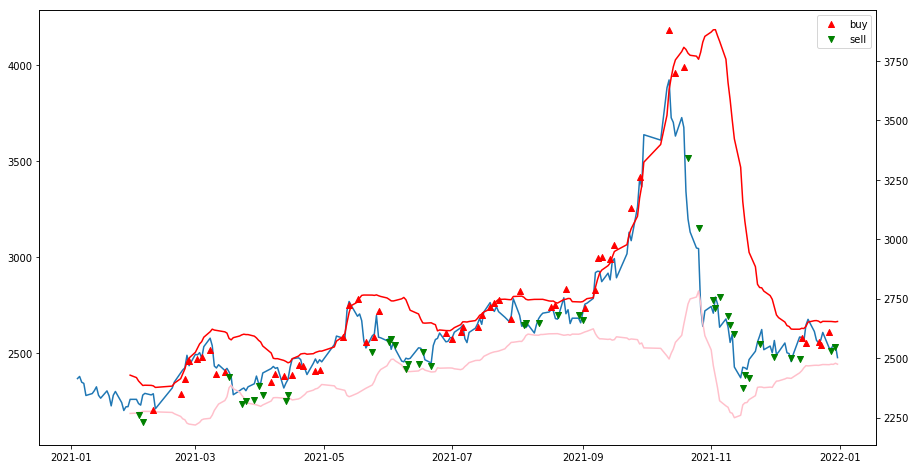

In [11]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(df_merge['date'],df_merge['close'])
ax1.plot(df_merge['date'],df_merge['up'],color='red')
ax1.plot(df_merge['date'],df_merge['down'],color='pink')

ax2 = ax1.twinx()
ax2.scatter(df_merge['date'],df_merge['buy'],marker='^',color='red')
ax2.scatter(df_merge['date'],df_merge['sell'],marker='v',color='green')
plt.legend()
plt.plot()

In [56]:
buys = []
sells = []
ret = []
flag = 0
strategy_date = []
strategy_return = []
# df_merge = df_merge.dropna()
for i in range(0,len(df_merge)):
    close = df_merge['close'].iat[i]
    buy = df_merge['buy'].iat[i]
    sell = df_merge['sell'].iat[i]
    if flag==0:
        if buy>0:
            buys.append(close)
            strategy_date.append(df_merge['date'].iat[i])
            flag=1
        else:
            flag=flag
    else:
        if sell>0:
            sells.append(close)
            flag=0
            ret.append(close/buys[-1]-1)
            strategy_date.append(df_merge['date'].iat[i])
        else:
            flag=flag
    if not buys:
        strategy_return.append(0)
    elif len(buys)%2 != 0:
        if close == buys[-1]:
            strategy_return_const = strategy_return[-1] + 1
        strategy_return.append(strategy_return_const*close/buys[-1]-1)
    else:
        strategy_return.append(strategy_return[-1])

In [210]:
df_ret = pd.DataFrame({'ret':ret})
cumret = ((df_ret+1).cumprod()-1).iloc[-1][0]
print('Cumulative return: ',cumret)
print('The max gain: ',np.max(ret))
print('The max loss: ',np.min(ret))
print('Trading number: ',len(ret))
print('Average return: ',np.mean(ret))

Cumulative return:  0.20631702896397797
The max gain:  0.1603773584905661
The max loss:  -0.03139198678232136
Trading number:  9
Average return:  0.022562386448038922


In [13]:
ret

[0.04934497816593897,
 -0.03139198678232136,
 0.04813915857605178,
 -0.007304882737408702,
 0.03359375000000009,
 -0.01796846351301795,
 -0.008499630450850004,
 0.1603773584905661,
 -0.023228803716608626]

In [18]:
df_ret = pd.DataFrame({'ret':ret})
re = (df_ret+1).cumprod()-1
print(re)

        ret
0  0.049345
1  0.016404
2  0.065333
3  0.057551
4  0.093078
5  0.073437
6  0.064313
7  0.235005
8  0.206317


In [57]:
return_compare = pd.DataFrame({'date':df_merge['date'], 'buy_and_hold':(df_merge['close']/df_merge['close'][0] - 1), 'strategy':strategy_return})
return_compare.head()
                  

,date,buy_and_hold,strategy
0,2021-01-04,0.000000,0.0
1,2021-01-05,0.004643,0.0
2,2021-01-06,-0.008020,0.0
3,2021-01-07,-0.010553,0.0
4,2021-01-08,-0.037146,0.0


[]

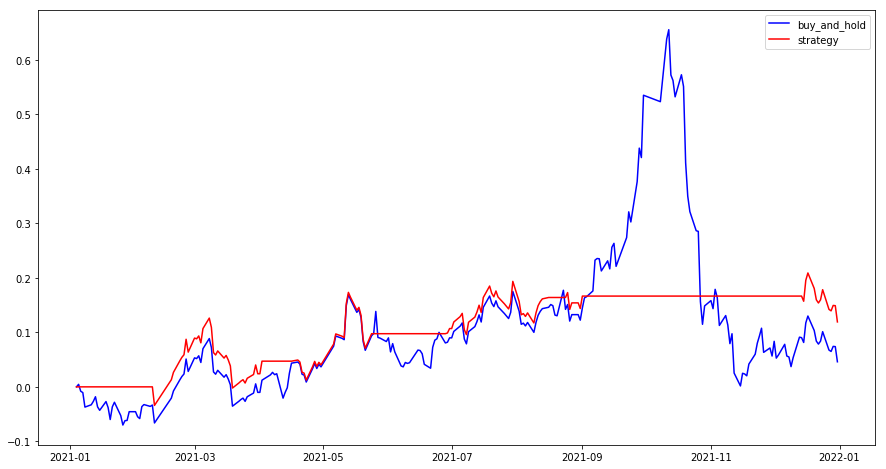

In [58]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(return_compare['date'],return_compare['buy_and_hold'], color='blue')
ax1.plot(return_compare['date'],return_compare['strategy'],color='red')
plt.legend()
plt.plot()   